# Import necessary packages

In [48]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Plot of closing price

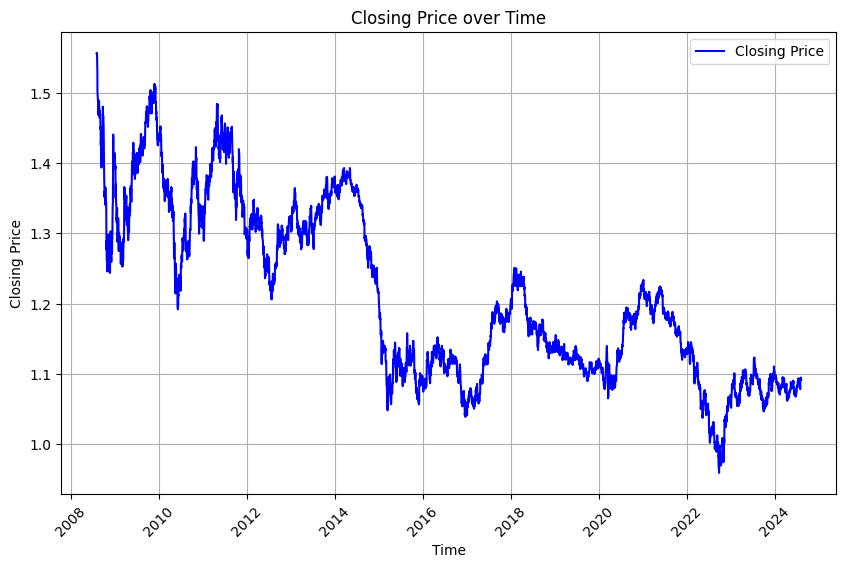

In [49]:
file_path = './Data/EURUSD_D1.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

data['Time'] = pd.to_datetime(data['Time'],format='%Y-%m-%d %H:%M:%S')

# Extract Time and Close columns
time_data = data['Time'].values  # Numpy array of time values
close_data = data['Close'].values  # Numpy array of closing prices

# Optionally, convert the closing prices to a PyTorch tensor
close_tensor = torch.tensor(close_data, dtype=torch.float32)

# Plot the closing price over time using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time_data, close_tensor, label="Closing Price", color='blue', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Closing Price over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.show()

# Stationarity test

In [56]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_, nobs_, critical_values, icbest_ = adfuller(data.iloc[:, -2])
if pvalue >0.05:
    print(f'p-value = {pvalue}. \nClosing price data is NOT stationary')
else:
    print(f'p-value = {pvalue}. \nData is stationary')

#Weak stationarity?


p-value = 0.06046931425545568. 
Closing price data is NOT stationary


# Data Exploration? Boxplot, see year trend, seasonality per quarter, etc

In [ ]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(data.iloc[:, -2],   model ='additive')

#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error

trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data.iloc[:, -2], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()


# Data loader

In [50]:
# Data Loader
class ForexDataset(Dataset):
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)         # Load the dataset

        n_past = 5
        self.features = []
        self.labels= []

        for i in range(n_past, len(self.data)):
            self.features.append(self.data.iloc[i-n_past:i, -2].values)  # Select n_past number of rows for the closing price
            self.labels.append(self.data.iloc[i, -2])  # The target value
 
    def __len__(self):
        return len(self.features)  # Return the number of samples
    
    def __getitem__(self, idx):
        # Get the features and labels as tensors
        feature = torch.tensor(self.features[idx], dtype=torch.float64)
        label = torch.tensor(self.labels[idx], dtype=torch.float64)

        return feature, label

# Loading the dataset and creating the dataloader
file_path = './Data/EURUSD_D1.csv'  # Replace with your actual file path
dataset = ForexDataset(file_path)

dataloader = DataLoader(dataset, batch_size=32, shuffle=False) # Create DataLoader for batch processing - will load batches of data


for batch_idx, (features, labels) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}")
    print(f"Features: {features}")
    print(f"Labels (Next Close Price): {labels}")



Batch 1
Features: tensor([[1.5561, 1.5566, 1.5564, 1.5464, 1.5419],
        [1.5566, 1.5564, 1.5464, 1.5419, 1.5311],
        [1.5564, 1.5464, 1.5419, 1.5311, 1.5003],
        [1.5464, 1.5419, 1.5311, 1.5003, 1.4932],
        [1.5419, 1.5311, 1.5003, 1.4932, 1.4912],
        [1.5311, 1.5003, 1.4932, 1.4912, 1.4891],
        [1.5003, 1.4932, 1.4912, 1.4891, 1.4896],
        [1.4932, 1.4912, 1.4891, 1.4896, 1.4773],
        [1.4912, 1.4891, 1.4896, 1.4773, 1.4686],
        [1.4891, 1.4896, 1.4773, 1.4686, 1.4699],
        [1.4896, 1.4773, 1.4686, 1.4699, 1.4694],
        [1.4773, 1.4686, 1.4699, 1.4694, 1.4791],
        [1.4686, 1.4699, 1.4694, 1.4791, 1.4750],
        [1.4699, 1.4694, 1.4791, 1.4750, 1.4887],
        [1.4694, 1.4791, 1.4750, 1.4887, 1.4791],
        [1.4791, 1.4750, 1.4887, 1.4791, 1.4781],
        [1.4750, 1.4887, 1.4791, 1.4781, 1.4724],
        [1.4887, 1.4791, 1.4781, 1.4724, 1.4643],
        [1.4791, 1.4781, 1.4724, 1.4643, 1.4743],
        [1.4781, 1.4724, 1.4643,

# FNN Model

[(tensor([1.5561, 1.5566, 1.5564, 1.5464, 1.5419, 1.5311, 1.5003, 1.4932, 1.4912,
        1.4891, 1.4896, 1.4773, 1.4686, 1.4699, 1.4694, 1.4791, 1.4750, 1.4887,
        1.4791, 1.4780, 1.4724, 1.4643, 1.4743, 1.4701, 1.4671, 1.4697, 1.4581,
        1.4487, 1.4513, 1.4257, 1.4267, 1.4352, 1.4133, 1.4092, 1.3936, 1.4006,
        1.4220, 1.4316, 1.4243, 1.4166, 1.4335, 1.4298, 1.4465, 1.4489, 1.4801,
        1.4683, 1.4651, 1.4662, 1.4611, 1.4536, 1.4366, 1.4118, 1.3990, 1.3786,
        1.3771, 1.3649, 1.3515, 1.3570, 1.3608, 1.3557, 1.3409, 1.3595, 1.3653,
        1.3562, 1.3433, 1.3484, 1.3405, 1.3442, 1.3337, 1.3005, 1.2770, 1.2898,
        1.2619, 1.2619, 1.2460, 1.2806, 1.2956, 1.2868, 1.2724, 1.2771, 1.2614,
        1.2981, 1.2914, 1.2687, 1.2716, 1.2823, 1.2745, 1.2511, 1.2457, 1.2786,
        1.2602, 1.2522, 1.2641, 1.2635, 1.2503, 1.2438, 1.2586, 1.2640, 1.2914,
        1.3030]), tensor(1.2894)), (tensor([1.5566, 1.5564, 1.5464, 1.5419, 1.5311, 1.5003, 1.4932, 1.4912, 1.4891,
  

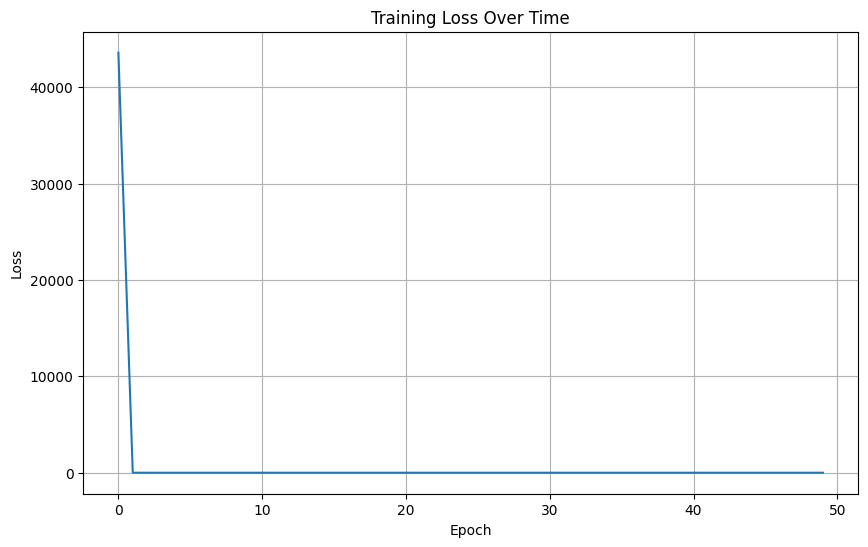

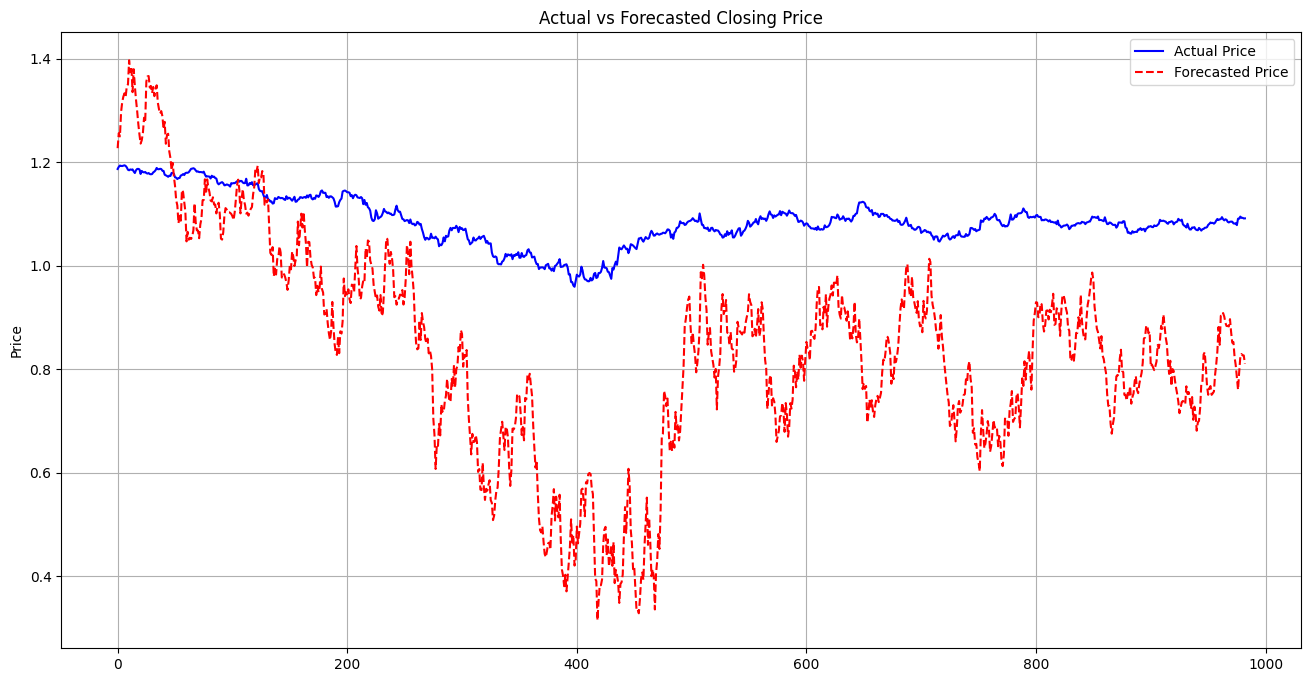

In [53]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Data Loader
class ForexDataset(Dataset):
    def __init__(self, file_path, n_past=5):
        self.data = pd.read_csv(file_path)  # Load the dataset

        self.features = []
        self.labels = []

        # Create sequences of n_past timesteps for features and the next closing price for labels
        for i in range(n_past, len(self.data)):
            self.features.append(self.data.iloc[i-n_past:i, -2].values)  # Use the previous n_past rows of the closing price
            self.labels.append(self.data.iloc[i, -2])  # The target is the closing price at the current timestep

    def __len__(self):
        return len(self.features)  # Return the number of samples
    
    def __getitem__(self, idx):
        # Convert features and labels to tensors
        feature = torch.tensor(self.features[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return feature, label

# Load the dataset
file_path = './Data/EURUSD_D1.csv'  # Replace with your actual file path
dataset = ForexDataset(file_path, 100)

# Split the dataset into training and test sets (without shuffling)
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_dataset, test_dataset = train_test_split(dataset,  test_size=0.2, random_state=42, shuffle=False)

print(train_dataset)

# train_dataset, test_dataset = torch.tensor(dataset[:train_size, :]), torch.tensor(dataset[train_size:, :])
print(train_dataset)
# DataLoader for batch processing (no shuffling for time series data)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for batch_idx , (features,label) in enumerate(train_loader):
    print(f'batch id {batch_idx}')
    print(f'features: {features}')
    print(f'label: {labels}')

# Define the Neural Network
input_size = 100  # Number of input features (n_past)
hidden_size = 64  # Hidden layer size
output_size = 1  # Output layer size (predicting the closing price)

torch.manual_seed(42)  # For reproducibility

# Initialize weights and biases for the hidden and output layers
W_hidden_1 = torch.randn(input_size, hidden_size, requires_grad=True)  
b_hidden = torch.randn(hidden_size, requires_grad=True)  
W_output = torch.randn(hidden_size, output_size, requires_grad=True) 
b_output = torch.randn(output_size, requires_grad=True)  

# Activation function (ReLU)
def relu(x):
    return torch.max(torch.tensor(0.0), x)

# Loss function (Mean Squared Error)
def loss_function(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Forward propagation function
def forward(features):
    hidden_layer = features @ W_hidden_1 + b_hidden  # Linear transformation (input -> hidden)
    activated_hidden = relu(hidden_layer)  # Apply ReLU activation
    output = activated_hidden @ W_output + b_output  # Linear transformation (hidden -> output)
    return output

# Training the neural network
learning_rate = 0.001
num_epochs = 50

# Track loss during training
train_loss_history = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_idx, (features, labels) in enumerate(train_loader):
        # Forward pass
        predicted_close = forward(features)
        
        # Compute the loss
        loss = loss_function(predicted_close, labels.view(-1, 1))  # Reshape labels for compatibility
        
        # Backward pass (compute gradients)
        loss.backward()
        
        # Update weights using gradient descent
        with torch.no_grad():
            W_hidden_1 -= learning_rate * W_hidden_1.grad
            b_hidden -= learning_rate * b_hidden.grad
            W_output -= learning_rate * W_output.grad
            b_output -= learning_rate * b_output.grad

            # Zero the gradients after updating
            W_hidden_1.grad.zero_()
            b_hidden.grad.zero_()
            W_output.grad.zero_()
            b_output.grad.zero_()
        
        epoch_loss += loss.item()
    
    # Average loss for the epoch
    avg_loss = epoch_loss / len(train_loader)
    train_loss_history.append(avg_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')

# Plot training loss history
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label="Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

# Evaluate the model on the test set
actual_prices = []
predicted_prices = []

with torch.no_grad():  # Disable gradient computation during testing
    for batch_idx, (features, labels) in enumerate(test_loader):
        predicted_close = forward(features)
        actual_prices.extend(labels.tolist())  # Collect actual prices
        predicted_prices.extend(predicted_close.view(-1).tolist())  # Collect predicted prices

# Plot actual vs predicted prices
plt.figure(figsize=(16, 8))
plt.plot(actual_prices, label="Actual Price", color='blue', linestyle='-')
plt.plot(predicted_prices, label="Forecasted Price", color='red', linestyle='--')
plt.ylabel('Price')
plt.title('Actual vs Forecasted Closing Price')
plt.legend()
plt.grid(True)
plt.show()
